In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')



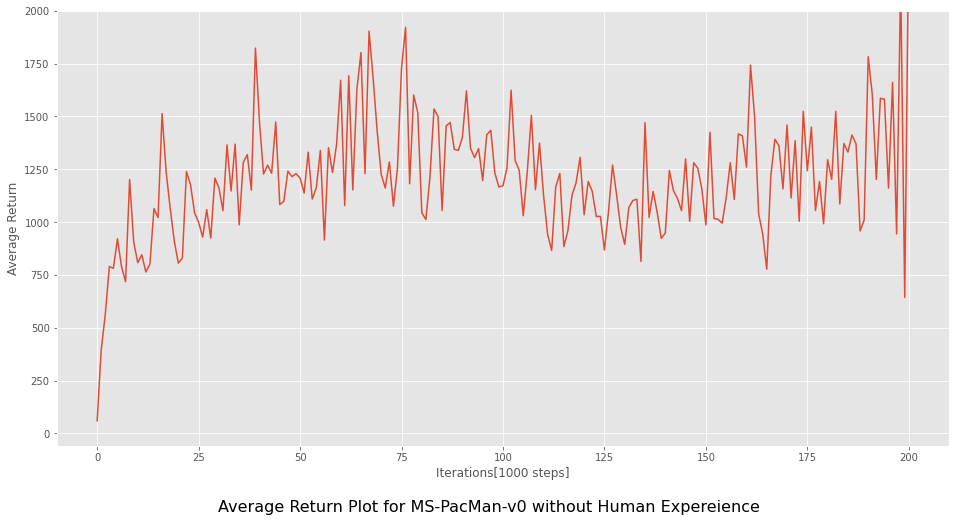

In [38]:
# Read a single file
df = pd.read_csv("./output/results_iter003.csv").set_index('iters')
fig = plt.figure(figsize=(16,8))
caption = "Average Return Plot for MS-PacMan-v0 without Human Expereience"
fig.text(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=16)
plt.plot(df.index/1000, df['returns'])
plt.ylabel('Average Return')
plt.xlabel('Iterations[1000 steps]')
plt.ylim(top=2000)
plt.show()

In [39]:
df = pd.DataFrame()
resultsFolder = "./output/"
files = [os.path.join(resultsFolder, f) for f in os.listdir(resultsFolder) if os.path.isfile(os.path.join(resultsFolder, f))]
for i,f in enumerate(files):
    # print(f)
    if df.empty:
        df = pd.read_csv(f)
        df.drop(df.columns[0], axis=1, inplace=True)
        df = df.set_index('iters')
    else:
        n_df = pd.read_csv(f)
        n_df.drop(n_df.columns[0], axis=1, inplace=True)
        # display(n_df.head())
        df = df.join(n_df.set_index('iters'), rsuffix=f"_00{i}")
df.rename(columns={'returns':'returns_000'}, inplace=True)
df.head


<bound method NDFrame.head of         returns_000  returns_001  returns_002  returns_003  returns_004
iters                                                                  
0              70.0        739.0       1584.0         60.0         70.0
1000          483.0        426.0       1300.0        396.0        593.0
2000          665.0        459.0        826.0        563.0        571.0
3000          747.0        509.0        838.0        790.0        760.0
4000          875.0        703.0       1442.0        781.0        657.0
...             ...          ...          ...          ...          ...
196000       1381.0       1218.0       1217.0       1661.0        933.0
197000       1551.0       1098.0       1367.0        944.0       1308.0
198000       1545.0       1206.0        701.0       2143.0       1270.0
199000       1515.0       1400.0       1023.0        644.0       1502.0
200000       1016.0       1294.0       1651.0       2402.0       1134.0

[201 rows x 5 columns]>

In [40]:
# est = df.mean(axis=1)
n_df = df.iloc[:, 0:4]
est = n_df.mean(axis=1)
std = n_df.std(axis=1)



In [41]:
def file_name(tag:int)->str:
    return os.path.join(os.getcwd(),'figs/') + \
    'fig_{:0=3d}.png'.format(tag)


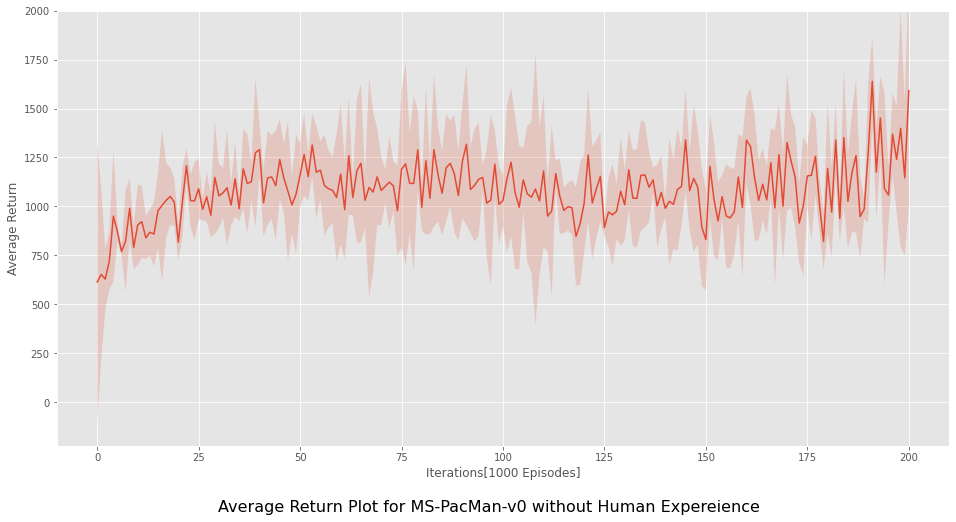

In [42]:
i = 1
while os.path.exists(file_name(i)):
    i += 1


fig = plt.figure(figsize=(16,8))
caption = "Average Return Plot for MS-PacMan-v0 without Human Expereience"
fig.text(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=16)
plt.fill_between(df.index/1000, est-std, est+std, alpha=0.2)
plt.plot(est.index/1000, est)
plt.ylabel('Average Return')
plt.xlabel('Iterations[1000 Episodes]')
plt.ylim(top=2000)


    
plt.savefig(file_name(i), format='png')
plt.show()

